In [3]:
import pandas as pd
import numpy as np

In [2]:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print df.applymap(add_one)

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [3]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [4]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [5]:
def convert_grades(grades):
    
    if 90<= grades < 100:
        letter_grade = 'A'
    elif 80<= grades < 90:
        letter_grade = 'B'
    elif 70<= grades < 80:
        letter_grade = 'C'
    elif 60<= grades < 70:
        letter_grade = 'D'
    elif 0<= grades < 60:
        letter_grade = 'F'
    
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return letter_grade
 

In [6]:
grades_df.applymap(convert_grades)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [10]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [8]:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print convert_grades_curve(grades_df['exam1'])
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print grades_df.apply(convert_grades_curve)
    

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [11]:
def standardize(df):
    
    def calculate_stds(x):
        return (x-x.mean())/x.std(ddof=0)
    
    return df.apply(calculate_stds)


standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [12]:
grades_df['exam1'].mean()

77.7

In [19]:
(grades_df.loc['Andre','exam1'] - grades_df['exam1'].mean())/grades_df['exam1'].std(ddof=0)

-2.315340832348233

In [20]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [24]:
print df.apply(np.mean)
print df.apply(np.max)

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [27]:
grades_df['exam1'].sort_values(ascending=False)[1]

91

In [30]:



def second_largest(df):
    
    def second_biggest(column):
        return column.sort_values(ascending=False)[1]
    
    return df.apply(second_biggest)
print grades_df
second_largest(grades_df)

         exam1  exam2
Andre       43     24
Barry       81     63
Chris       78     56
Dan         75     56
Emilio      89     67
Fred        70     51
Greta       91     79
Humbert     65     46
Ivan        98     72
James       87     60


exam1    91
exam2    72
dtype: int64

In [32]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print df
print '' # Create a blank line between outputs
print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [33]:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print df
    print '' # Create a blank line between outputs
    print df + s


    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [34]:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s
    

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [35]:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1   2   3   a   b   c   d
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [36]:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df + s

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [42]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
0: [10, 20, 30, 40],
1: [50, 60, 70, 80],
2: [90, 100, 110, 120],
3: [130, 140, 150, 160]
})
print df
print '' # Create a blank line between outputs
print df.add(s, axis='index')

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [43]:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print df
    print '' # Create a blank line between outputs
    print df.add(s, axis='columns')
    # The functions sub(), mul(), and div() work similarly to add()
    

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [44]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [47]:
grades_df.std()
grades_df.std(ddof=0)

exam1    14.986994
exam2    14.492757
dtype: float64

In [55]:
def standardize(df):
    difference_mean = df.sub(df.mean(),axis='columns')
    stds_mean = difference_mean.div(df.std(ddof=0),axis='columns')
    
    return stds_mean
        
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [56]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


In [57]:
    print example_df

   above_three   even  value
a        False  False      1
b        False  False      3
c        False   True      2
d         True   True      4
e        False  False      1
f         True   True      6
g         True   True      4


In [58]:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print grouped_data.groups
    

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}


In [59]:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print grouped_data.groups

{(True, False): Index([u'c'], dtype='object'), (False, False): Index([u'a', u'b', u'e'], dtype='object'), (True, True): Index([u'd', u'f', u'g'], dtype='object')}


In [61]:
    grouped_data = example_df.groupby('even')
    print grouped_data.sum()
    

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [62]:
    print grouped_data.sum()['value']
    
    print '\n' # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print grouped_data['value'].sum()

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [4]:
nyc_subway = pd.read_csv('nyc_subway_weather.csv')
nyc_subway.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [6]:
ridership_by_day = nyc_subway.groupby('day_week').mean()['ENTRIESn_hourly']
ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

In [80]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [1]:
ridership_by_day.plot()

NameError: name 'ridership_by_day' is not defined

In [105]:
def get_hourly_entries_and_exits(entries_and_exits):
    
    hourly_entries_and_exits = pd.DataFrame()
    
    hourly_entries_and_exits['hourly_entries'] = entries_and_exits['ENTRIESn'] - entries_and_exits['ENTRIESn'].shift()
    hourly_entries_and_exits['hourly_exists'] = entries_and_exits['EXITSn'] - entries_and_exits['EXITSn'].shift()
    
    
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return hourly_entries_and_exits
station_grouped = nyc_subway.groupby('UNIT')
station_grouped['ENTRIESn', 'EXITSn'].apply(get_hourly_entries_and_exits)
 

hourly_entries  hourly_exists
UNIT                                     
R003 0                 NaN            NaN
     1                 0.0            0.0
     2                 0.0            0.0
     3                 0.0            0.0
     4                 0.0            0.0
     5                15.0           34.0
     6           1430341.0       963731.0
     7          -1429834.0      -963573.0
     8               490.0          132.0
     9               231.0          232.0
     10              235.0          405.0
     11               74.0          164.0
     12               20.0           33.0
     13              975.0          234.0
     14              267.0          257.0
     15              277.0          398.0
     16               83.0          174.0
     17               24.0           35.0
     18              532.0          130.0
     19              454.0          107.0
     20              247.0          249.0
     21              220.0          356.0
     22               59.0          184.0
     23               19.0           35.0
     24              995.0          190.0
     25              307.0          245.0
     26              228.0          391.0
     27               73.0          176.0
     28               22.0           48.0
     29              970.0          221.0
...                    ...            ...
R464 42619             0.0            0.0
     42620             0.0            0.0
     42621             0.0            0.0
     42622             0.0            0.0
     42623             0.0            0.0
     42624             0.0            0.0
     42625             0.0            0.0
     42626             0.0            0.0
     42627             0.0            0.0
     42628             0.0            0.0
     42629             0.0            0.0
     42630             0.0            0.0
     42631             0.0            0.0
     42632             0.0            0.0
     42633       -290767.0       -59788.0
     42634        290767.0        59788.0
     42635             0.0            0.0
     42636             0.0            0.0
     42637             0.0            0.0
     42638             0.0            0.0
     42639       -290767.0       -59788.0
     42640        290767.0        59788.0
     42641             0.0            0.0
     42642             0.0            0.0
     42643             0.0            0.0
     42644        147417.0        37524.0
     42645       -276544.0       -73016.0
     42646        129127.0        35492.0
     42647             0.0            0.0
     42648             0.0            0.0

[42649 rows x 2 columns]

In [83]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [101]:
def standardize(xs):
    return (xs - xs.mean()) / xs.std()
grouped_data = example_df.groupby('even')
print example_df.groupby('even').groups
print grouped_data['value'].apply(standardize)
    

{False: Index([u'a', u'b', u'e'], dtype='object'), True: Index([u'c', u'd', u'f', u'g'], dtype='object')}
a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [93]:
    def second_largest(xs):
        sorted_xs = xs.sort_values(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')

    print grouped_data['value'].apply(second_largest)

even
False    1
True     4
Name: value, dtype: int64


In [106]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})


In [107]:
subway_df

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135


In [108]:
weather_df

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5
5,05-03-11,0,0,40.691320,-73.867135,30.14,0,54.0,3.5
6,05-04-11,0,0,40.689945,-73.872564,29.98,0,57.2,15.0
7,05-04-11,0,0,40.691320,-73.867135,29.98,0,57.2,15.0
8,05-05-11,0,0,40.689945,-73.872564,30.01,0,48.9,15.0
9,05-05-11,0,0,40.691320,-73.867135,30.01,0,48.9,15.0


In [112]:
subway_df.merge(weather_df, on=['DATEn','hour','latitude','longitude'], how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [113]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [120]:
nyc_subway.head(10)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258000,55.980000,7.86,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15.0,34.0,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19.0,40.0,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488.0,118.0,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490.0,132.0,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.0,30.238333,54.166667,8.25,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231.0,232.0,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.0,30.238333,54.166667,8.25,40.700348,-73.887177


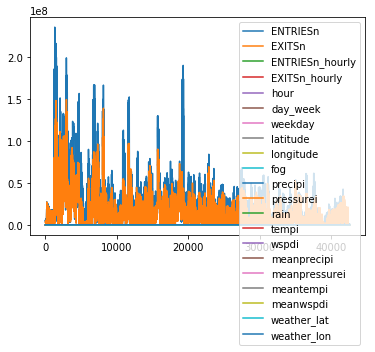

In [115]:
nyc_subway.plot()

In [116]:

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


In [117]:
    first_even = example_df.groupby('even').first()
    print first_even
    print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame
    

       above_three  value
even                     
False        False      1
True         False      2


KeyError: 'even'

In [118]:
    first_even = example_df.groupby('even', as_index=False).first()
    print first_even
    print first_even['even'] # Now 'even' is still a column in the DataFrame


    even  above_three  value
0  False        False      1
1   True        False      2
0    False
1     True
Name: even, dtype: bool


In [131]:
data_by_location = nyc_subway.groupby(['weather_lat','weather_lon'],as_index=False).mean()

In [132]:
data_by_location.head()

,weather_lat,weather_lon,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,...,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi
0,40.600204,-73.947723,1.254686e+07,5.517395e+06,648.422857,261.040000,10.125714,2.925714,0.714286,40.595234,...,0.011429,0.006114,29.972057,0.222857,63.468571,5.536000,0.006114,29.972057,63.468571,5.536000
1,40.603489,-73.958763,1.932256e+07,1.686400e+07,947.358974,801.143590,10.060399,2.901425,0.714530,40.597709,...,0.009117,0.006011,29.973020,0.220513,63.466439,5.571054,0.006011,29.973020,63.466439,5.571054
2,40.635826,-73.960793,1.677146e+07,1.325605e+07,947.285334,700.869301,10.101824,2.897036,0.715426,40.635164,...,0.008359,0.006223,29.971068,0.225684,63.563526,5.569491,0.006223,29.971068,63.563526,5.569491
3,40.651363,-73.694176,3.536026e+06,4.041159e+06,340.375984,367.500000,10.031496,2.883858,0.724409,40.599773,...,0.023622,0.002165,29.977776,0.212598,61.950984,9.922244,0.002165,29.977776,61.950984,9.922244
4,40.660004,-73.844849,3.486001e+06,3.566231e+06,196.851128,208.396992,10.123308,2.893233,0.717293,40.611480,...,0.021053,0.002767,29.979053,0.206015,61.933835,9.990677,0.002767,29.979053,61.933835,9.990677


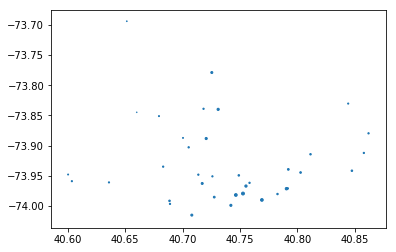

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(data_by_location['weather_lat'],data_by_location['weather_lon'],s = 2*(data_by_location['ENTRIESn_hourly']/data_by_location['ENTRIESn_hourly'].std()))